In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

clinical_trial_df.head()
# Combine the data into a single dataset
combined_mouse = pd.merge(clinical_trial_df, mouse_df, 
                                 how='left', on='Mouse ID')

# Display the data table for preview
combined_mouse.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_mean_df =  combined_mouse.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]


# Convert to DataFrame
tumor_mean_group = pd.DataFrame(tumor_mean_df)

# Preview DataFrame
tumor_mean_group.reset_index().head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem_df =  combined_mouse.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_sem_group = pd.DataFrame(tumor_sem_df)

# Preview DataFrame
tumor_sem_group.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_group = tumor_mean_group.reset_index()

tumor_mean_group_pivot = tumor_mean_group.pivot(index = "Timepoint" , columns = "Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_mean_group_pivot

tumor_sem_group = tumor_sem_group.reset_index()
tumor_sem_group_pivot = tumor_sem_group.pivot(index = "Timepoint" , columns = "Drug")["Tumor Volume (mm3)"]
# Save the Figure
tumor_sem_group_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


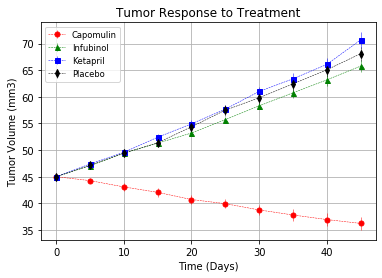

In [5]:
# Generate the Plot (with Error Bars) #the .index part in tumor_mean_group_pivot.index, is where we tell what x-axis will be.

plt.errorbar(tumor_mean_group_pivot.index, tumor_mean_group_pivot["Capomulin"], yerr=tumor_sem_group_pivot["Capomulin"],
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_group_pivot.index, tumor_mean_group_pivot["Infubinol"], yerr=tumor_sem_group_pivot["Infubinol"],
             color="g", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_group_pivot.index, tumor_mean_group_pivot["Ketapril"], yerr=tumor_sem_group_pivot["Ketapril"],
             color="b", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_mean_group_pivot.index, tumor_mean_group_pivot["Placebo"], yerr=tumor_sem_group_pivot["Placebo"],
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)
plt.savefig("analysis/Fig1.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean_df =  combined_mouse.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
metastatic_mean_group = pd.DataFrame(metastatic_mean_df)


# Preview DataFrame
metastatic_mean_group.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem_df =  combined_mouse.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
metastatic_sem_group = pd.DataFrame(metastatic_sem_df)
# Preview DataFrame
metastatic_sem_group.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sem_group = metastatic_sem_group.reset_index()

metastatic_sem_group_pivot = metastatic_sem_group.pivot(index = "Timepoint" , columns = "Drug")["Metastatic Sites"]

# Preview that Reformatting worked
metastatic_sem_group_pivot

metastatic_mean_group = metastatic_mean_group.reset_index()
metastatic_mean_group_pivot = metastatic_mean_group.pivot(index = "Timepoint" , columns = "Drug")["Metastatic Sites"]
# Save the Figure
metastatic_mean_group_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


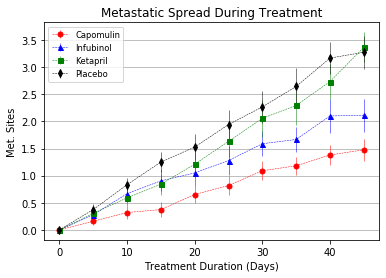

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(metastatic_mean_group_pivot.index, metastatic_mean_group_pivot["Capomulin"], yerr=metastatic_sem_group_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_mean_group_pivot.index, metastatic_mean_group_pivot["Infubinol"], yerr=metastatic_sem_group_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_mean_group_pivot.index, metastatic_mean_group_pivot["Ketapril"], yerr=metastatic_sem_group_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_mean_group_pivot.index, metastatic_mean_group_pivot["Placebo"], yerr=metastatic_sem_group_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig("analysis/Fig2.png")
# Show the Figure
plt.show()


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = combined_mouse.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
#dictionary of lists in mouse count
survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count.reset_index().head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()

survival_count_pivot = survival_count.pivot(index = "Timepoint" , columns = "Drug")["Mouse Count"]


# Preview the Data Frame
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


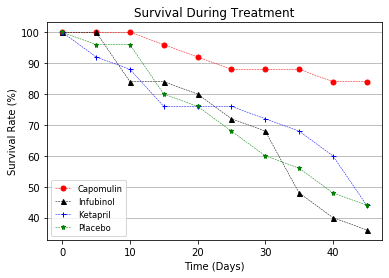

In [12]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "k^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "b+", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Placebo"] / 25, "g*", linestyle="dashed", markersize=5, linewidth=0.50)

# Orient widths. Add labels, tick marks, etc. 
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/fig3.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (tumor_mean_group_pivot.iloc[-1] - tumor_mean_group_pivot.iloc[0]) / tumor_mean_group_pivot.iloc[0]
# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

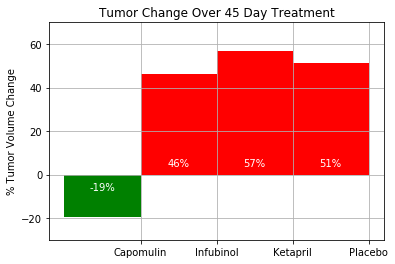

In [53]:
# Store all Relevant Percent Changes into a Tuple
percentage_changes = (tumor_pct_change["Capomulin"],
              tumor_pct_change["Infubinol"],
              tumor_pct_change["Ketapril"],
              tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
index = np.arange(len(percentage_changes))
width = 1
rectsPass = ax.bar(index[0], percentage_changes[0], width, color='green')
rectsFail = ax.bar(index[1:], percentage_changes[1:], width, color='red')


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(index + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
   for rect in rects:
    height = rect.get_height()     
    ax.text(rect.get_x() + rect.get_width()/2., 3, 
    "%d%%" % int(height),ha='center', va='bottom', color="white")
    
def autolabelPass(rects):
   for rect in rects:
    height = rect.get_height()     
    ax.text(rect.get_x() + rect.get_width()/2., -8, 
    "%d%%" % int(height),ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("analysis/Fig4.png")
# Show the Figure
fig.show()


## Analysis